 **Loading Libraries**

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #vizualization
import matplotlib.pyplot as plt #vizualization
from matplotlib import cm

import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import shuffle

# Data Loading
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
data


{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**Exploratory Analysis**

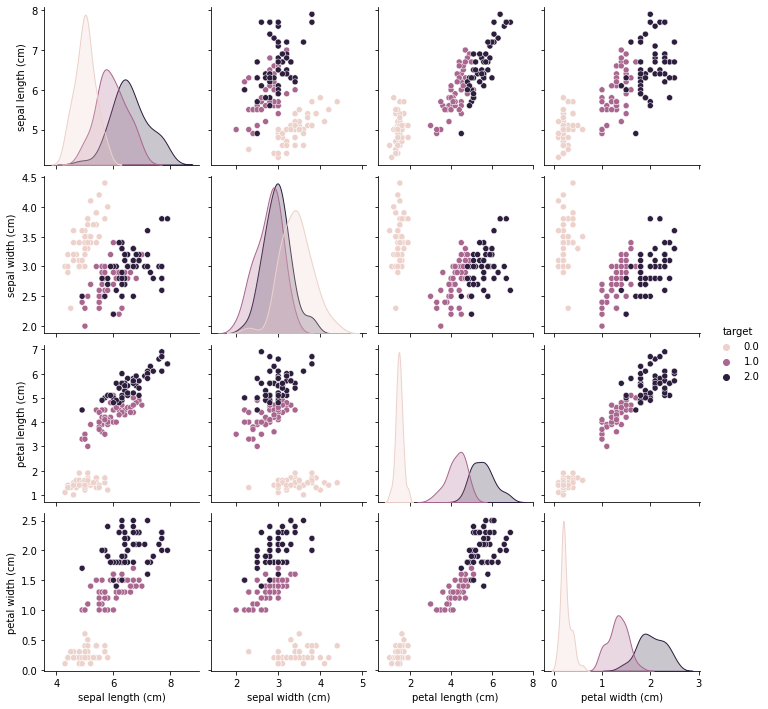

In [ ]:
sns.pairplot(data=data[data.columns[0:6]],hue='target')
plt.show()

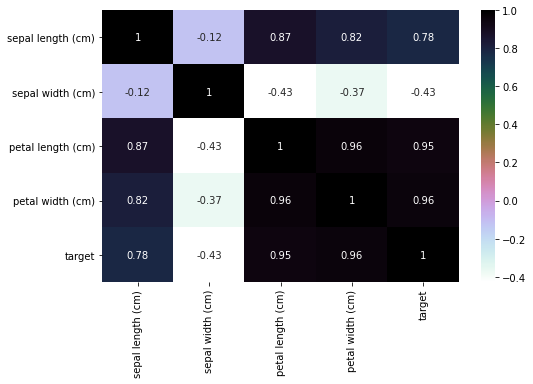

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()  #if Value is +1 then its more corealted else its-1 less corealted

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
data= shuffle(data)

In [ ]:
X=data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
target=data[['target']]
y_true=target.copy()

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
32,5.2,4.1,1.5,0.1
14,5.8,4.0,1.2,0.2
11,4.8,3.4,1.6,0.2
83,6.0,2.7,5.1,1.6
...,...,...,...,...
88,5.6,3.0,4.1,1.3
35,5.0,3.2,1.2,0.2
17,5.1,3.5,1.4,0.3
9,4.9,3.1,1.5,0.1


In [ ]:
target

,target
140,2.0
32,0.0
14,0.0
11,0.0
83,1.0
...,...
88,1.0
35,0.0
17,0.0
9,0.0


**Training the model**

In [18]:
X= StandardScaler().fit_transform(X)
target = LabelBinarizer().fit_transform(target)

In [19]:
target

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0,

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=101)

In [21]:
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu')) #relu truns negative value to postive ones and postive value reamins as it is
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax')) #softmax take desicion on basics of their probabity
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # to comapile
history = model.fit(x_train, y_train, epochs = 120 , validation_data = (x_test, y_test)) #is nothing a hyper parameter where 1 epoch is when data set goings upward and backward in data set

Epoch 1/120
4/4 [==============================] - 18s 272ms/step - loss: 1.0424 - accuracy: 0.5248 - val_loss: 1.0699 - val_accuracy: 0.5000
Epoch 2/120
4/4 [==============================] - 0s 12ms/step - loss: 1.0314 - accuracy: 0.5219 - val_loss: 1.0564 - val_accuracy: 0.5000
Epoch 3/120
4/4 [==============================] - 0s 14ms/step - loss: 1.0136 - accuracy: 0.5104 - val_loss: 1.0438 - val_accuracy: 0.5000
Epoch 4/120
4/4 [==============================] - 0s 12ms/step - loss: 0.9995 - accuracy: 0.5513 - val_loss: 1.0303 - val_accuracy: 0.5000
Epoch 5/120
4/4 [==============================] - 0s 11ms/step - loss: 0.9786 - accuracy: 0.5398 - val_loss: 1.0161 - val_accuracy: 0.5000
Epoch 6/120
4/4 [==============================] - 0s 13ms/step - loss: 0.9664 - accuracy: 0.5408 - val_loss: 1.0019 - val_accuracy: 0.5000
Epoch 7/120
4/4 [==============================] - 0s 12ms/step - loss: 0.9429 - accuracy: 0.5471 - val_loss: 0.9870 - val_accuracy: 0.5000
Epoch 8/120
4/4 [=

In [22]:
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Model Perfomed**

In [23]:
y_test= np.argmax(y_test,axis=1)

In [24]:
y_test

array([2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 0])

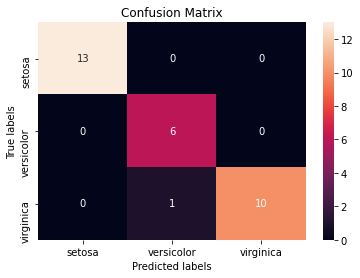

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.tolist(),y_pred.tolist())
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax); #annot = true to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

In [26]:
from sklearn.metrics import precision_recall_fscore_support

In [27]:
precision_recall_fscore_support(y_test.tolist(),y_pred.tolist(),average='macro')

(0.9523809523809524, 0.9696969696969697, 0.9584859584859583, None)

**Plotting Accuracy and loss**

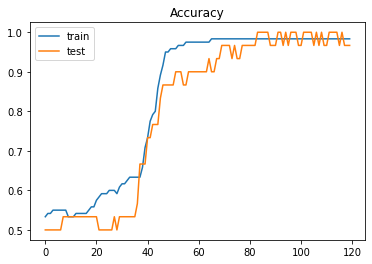

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

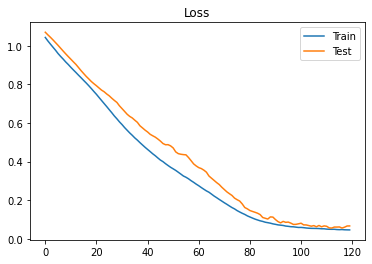

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()